In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import signac
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from collections import OrderedDict, defaultdict
style.use('ggplot')
%matplotlib inline

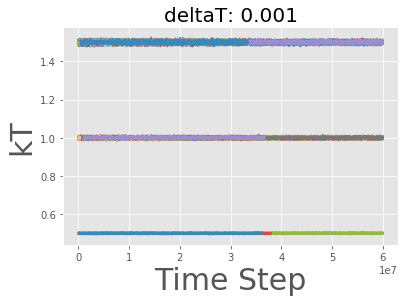

In [15]:
project = signac.get_project("/home/mikehenry/epoxy-stuff/new_chem_data")
#project = signac.get_project("/home/mikehenry/epoxy-stuff/rxn-rate-cal")
deltaTs = [0.0, 1e-06, 1e-05, 0.0001, 0.001, 5]
#deltaTs = [0.001]

for deltaT in deltaTs:
    jobs = project.find_jobs(filter={"deltaT":deltaT}, doc_filter={"cure_percent":{"$gte":89}})
    for job in jobs:
        if job.sp.enable_rxn_enthalpy == True:
            data = np.genfromtxt(job.fn("out.log"))
            x = data[:,0]
            y = data[:,5]
            plt.plot(x,y)


            plt.xlabel("Time Step", fontsize=30)
            plt.ylabel("kT", fontsize=30)
            plt.title("deltaT: {}".format(deltaT), size=20)
            #plt.xlim(0.001,1e-1)
            #plt.ylim(0.8, 1)

            #plt.show()

In [9]:
print(sorted(job.sp))

['AA_alpha', 'AA_interaction', 'AB_alpha', 'AB_bond_const', 'AB_bond_dist', 'AB_interaction', 'AC_alpha', 'AC_interaction', 'BB_interaction', 'BC_alpha', 'BC_interaction', 'CC_bond_angle', 'CC_bond_angle_const', 'CC_bond_const', 'CC_bond_dist', 'CC_interaction', 'E_factor', 'E_scale', 'T', 'activation_energy', 'bond', 'bond_period', 'calibrationT', 'curing_log_period', 'dcd_write', 'deltaT', 'density', 'enable_rxn_enthalpy', 'exclude_mixing_in_output', 'ext_init_struct_path', 'gamma', 'kT', 'legacy_bonding', 'log_curing', 'log_write', 'max_a_bonds', 'max_b_bonds', 'md_dt', 'mix_dt', 'mix_kt', 'mix_time', 'n_mul', 'n_particles', 'nl_tuning', 'num_a', 'num_b', 'num_c10', 'old_init', 'percent_bonds_per_step', 'pot', 'profile', 'profile_run', 'sec_bond_weight', 'shrink', 'shrinkT', 'shrink_time', 'sim_name', 'stop_after_percent', 't_Final', 't_SetT', 'temp_prof', 'trial', 'use_dybond_plugin']


In [10]:
print(job.sp.deltaT)

0.001


In [11]:
print(job)

550951638f6cd114205eaf62ec970029


In [12]:
print(job.sp.enable_rxn_enthalpy)

True


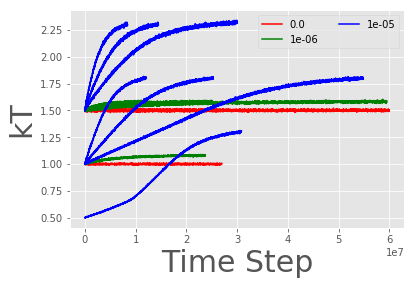

In [9]:
project = signac.get_project("/home/mikehenry/epoxy-stuff/flow-enth-test")
#project = signac.get_project("/home/mikehenry/epoxy-stuff/rxn-rate-cal")
deltaTs = [0.0, 1e-06, 1e-05, 0.0001, 0.001, 5]
#deltaTs = [0.001]
color_dic = {0.0: "red", 1e-05:"blue", 1e-06:"green"}
for deltaT in deltaTs:
    jobs = project.find_jobs(filter={"deltaT":deltaT}, doc_filter={"cure_percent":{"$gte":89}})
    for job in jobs:
        if job.sp.enable_rxn_enthalpy == True:
            data = np.genfromtxt(job.fn("out.log"))
            x = data[:,0]
            y = data[:,5]
            plt.plot(x,y, label=deltaT, color=color_dic[deltaT])


plt.xlabel("Time Step", fontsize=30)
plt.ylabel("kT", fontsize=30)
            
handles, labels = plt.gca().get_legend_handles_labels()
#print(labels)
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=2)
            

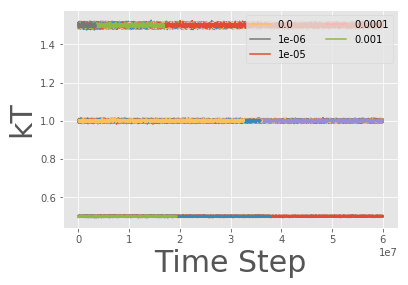

In [11]:
project = signac.get_project("/home/mikehenry/epoxy-stuff/new_chem_data")
#project = signac.get_project("/home/mikehenry/epoxy-stuff/rxn-rate-cal")
deltaTs = [0.0, 1e-06, 1e-05, 0.0001, 0.001, 5]
#deltaTs = [0.001]
color_dic = {0.0: "red", 1e-05:"blue", 1e-06:"green"}
for deltaT in deltaTs:
    jobs = project.find_jobs(filter={"deltaT":deltaT}, doc_filter={"cure_percent":{"$gte":89}})
    for job in jobs:
        if job.sp.enable_rxn_enthalpy == True:
            data = np.genfromtxt(job.fn("out.log"))
            x = data[:,0]
            y = data[:,5]
            plt.plot(x,y, label=deltaT)


plt.xlabel("Time Step", fontsize=30)
plt.ylabel("kT", fontsize=30)
            
handles, labels = plt.gca().get_legend_handles_labels()
#print(labels)
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=2)
            